##  Final Project : Building a Nutritional Health Classifier



In [ ]:
#import datasets

In [17]:
import pandas as pd

# Load the training dataset
train_data = pd.read_csv('/Users/yashaswipatki/Downloads/train_data.csv')
test_data = pd.read_csv('/Users/yashaswipatki/Downloads/actual_test.csv')

# Split the training data into features (X_train) and target variable (y_train)
X_train = train_data.drop(columns=['Health Category'])
y_train = train_data['Health Category']

# Display the shape of the training and testing data
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (1558, 13)
Testing data shape: (1558, 12)


In [23]:
train_data.head()


,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C,Health Category
0,171331,"Spices, poultry seasoning",Spices and Herbs,307.0,9.59,65.59,7.53,0.0 mg,11.3,9.31 g,0.0 g,12.0 mg,Indulgent
1,172162,"Beef, plate steak, boneless, outside skirt, se...",Beef Products,238.0,17.69,0.35,18.44,71.0 mg,0.0,62.64 g,0.0 g,0.0 mg,Indulgent
2,172920,"Soup, tomato rice, canned, prepared with equal...","Soups, Sauces, and Gravies",47.0,0.82,8.54,1.06,1.0 mg,0.7,88.52 g,0.0 g,5.8 mg,Indulgent
3,172659,"Lamb, Australian, imported, fresh, leg, bottom...","Lamb, Veal, and Game Products",187.0,20.97,0.00,11.43,63.0 mg,0.0,67.93 g,0.0 g,0.0 mg,Balanced
4,167754,"Pummelo, raw",Fruits and Fruit Juices,38.0,0.76,9.62,0.04,0.0 mg,1.0,89.1 g,NaN,61.0 mg,Indulgent


Summary Statistics:
              FDC_ID     Calories      Protein  Carbohydrate    Total fat  \
count    1558.000000  1558.000000  1558.000000   1558.000000  1558.000000   
mean   171395.051990   220.541720    11.953806     19.226341    10.912991   
std      2215.343862   170.851821    10.778995     25.274504    16.602603   
min    167515.000000     0.000000     0.000000      0.000000     0.000000   
25%    169531.250000    88.250000     2.182500      0.000000     0.800000   
50%    171382.500000   179.000000     9.055000      7.600000     5.100000   
75%    173350.500000   319.000000    20.495000     26.570000    13.972500   
max    175293.000000   900.000000    88.320000     99.100000   100.000000   

             Fiber  
count  1448.000000  
mean      2.023135  
std       4.263749  
min       0.000000  
25%       0.000000  
50%       0.200000  
75%       2.200000  
max      44.500000  


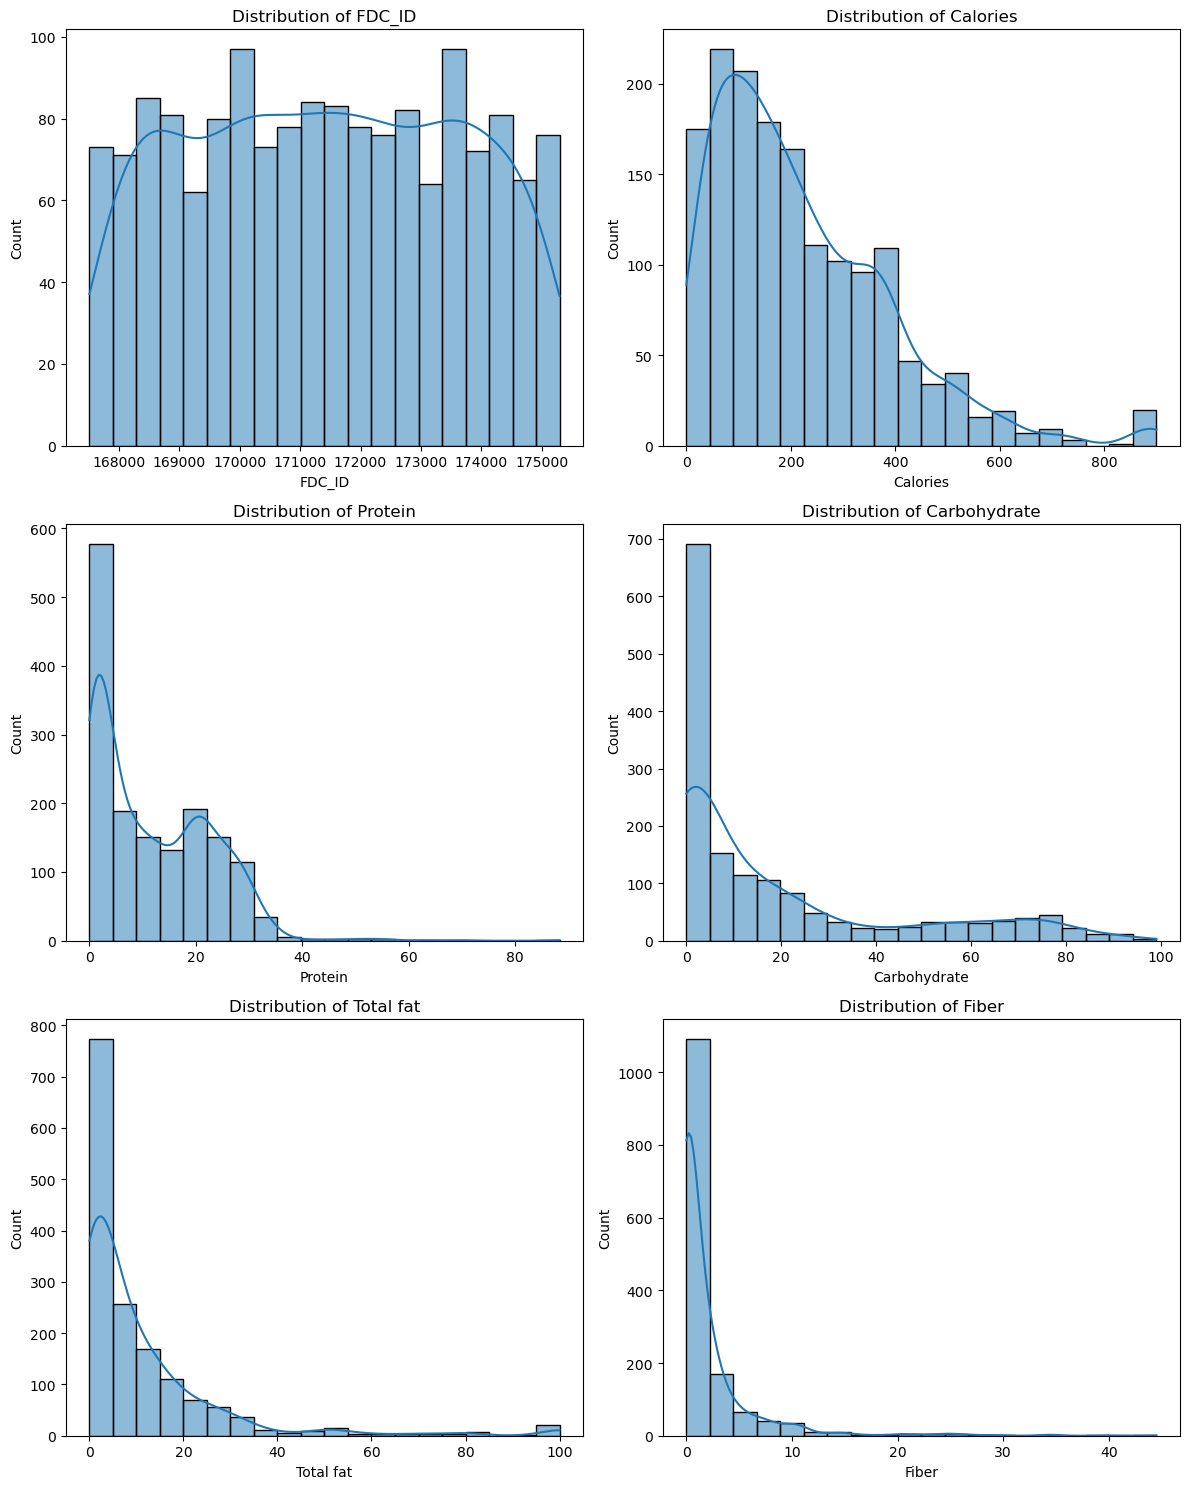

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Calculate summary statistics for each feature
summary_stats = train_data.describe()
print("Summary Statistics:")
print(summary_stats)

# Determine the number of numeric features
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
num_numeric_features = len(numeric_features)

# Determine the layout of subplots
num_rows = math.ceil(num_numeric_features / 2)
num_cols = min(2, num_numeric_features)  # Maximum 2 columns

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5*num_rows))

# Plot the distribution of numeric features
for i, feature in enumerate(numeric_features):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.histplot(train_data[feature], ax=axes[row_index, col_index], kde=True, bins=20)
    axes[row_index, col_index].set_title(f'Distribution of {feature}')

# Ensure tight layout
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

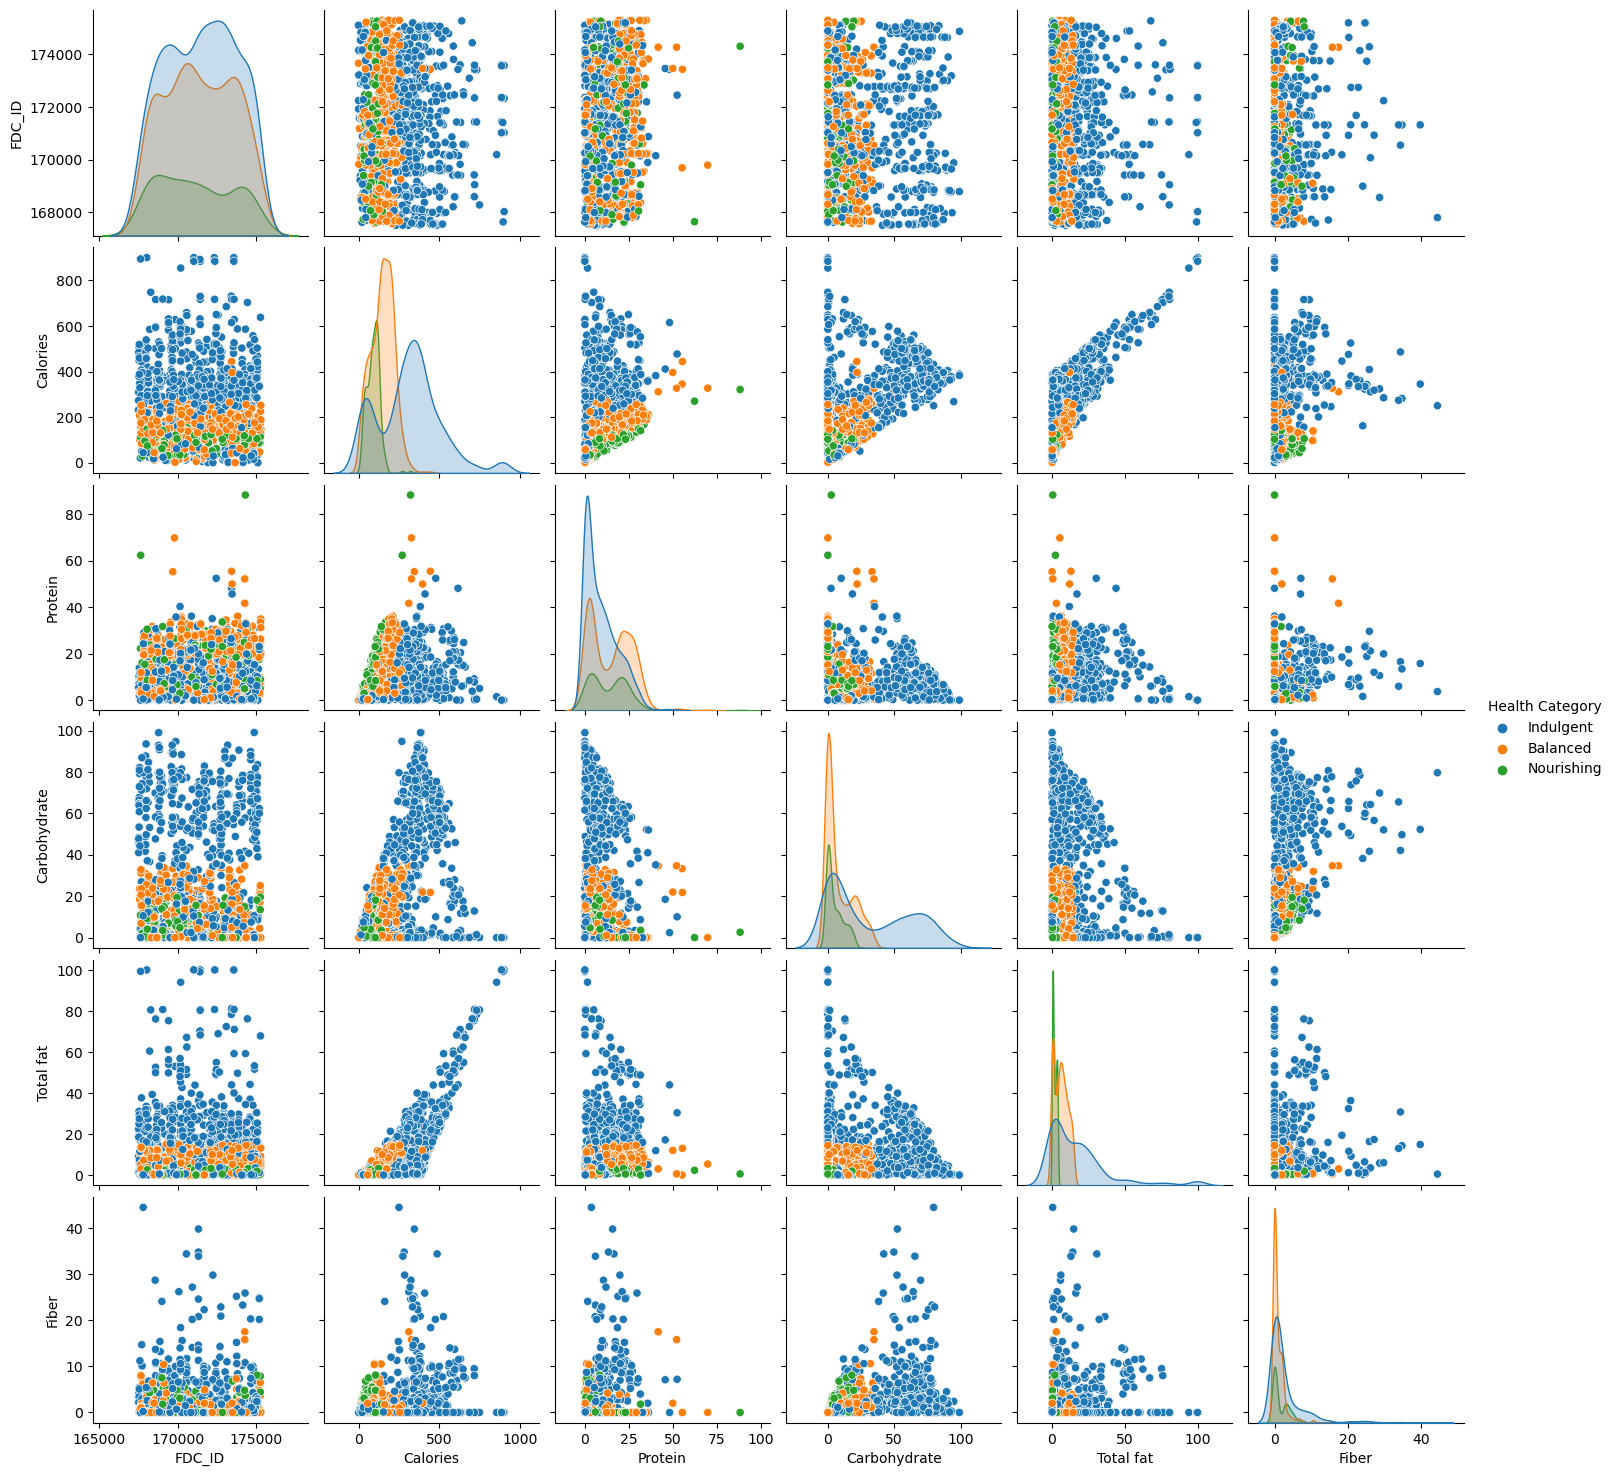

In [7]:
# Visualize relationships between features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.pairplot(train_data, hue="Health Category")
plt.show()

In [76]:
#HANDLE missing values

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load train data
train_data = pd.read_csv("train_data.csv")

# Investigate missing values
missing_values = train_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Choose appropriate imputation technique
# Here, we'll use mean imputation for numeric features and mode imputation for categorical features
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_data.select_dtypes(include=['object']).columns

for feature in numeric_features:
    train_data[feature].fillna(train_data[feature].mean(), inplace=True)

for feature in categorical_features:
    train_data[feature].fillna(train_data[feature].mode()[0], inplace=True)

# Encode categorical features
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    train_data[feature] = le.fit_transform(train_data[feature])
    label_encoders[feature] = le

# Address class imbalance using oversampling (SMOTE)
X = train_data.drop(columns=['Health Category'])  # Update the target variable name
y = train_data['Health Category']  # Update the target variable name

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



Missing Values:
 FDC_ID               0
Item                 0
Category             0
Calories             0
Protein              0
Carbohydrate         0
Total fat            0
Cholesterol         68
Fiber              110
Water                0
Alcohol            467
Vitamin C           78
Health Category      0
dtype: int64


In [78]:
# feature engineering

In [79]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Calculate new features with error handling
train_data['Protein_to_Calories_Ratio'] = train_data['Protein'] / train_data['Calories']
train_data['TotalFat_to_Calories_Ratio'] = train_data['Total fat'] / train_data['Calories']

# Handling division by zero or very small denominator values for Fiber
train_data['Fiber_to_Calories_Ratio'] = np.where(train_data['Calories'] == 0,
                                                  0, train_data['Fiber'] / train_data['Calories'])

# Replace infinite or very large values with a large number
new_data = train_data[['Protein_to_Calories_Ratio', 'TotalFat_to_Calories_Ratio', 'Fiber_to_Calories_Ratio', 'Health Category']]
new_data.replace([np.inf, -np.inf], np.nan, inplace=True)
new_data.fillna(1e6, inplace=True)  # Replace NaN with a large number

# Perform feature scaling if needed
scaler = StandardScaler()
scaled_features = scaler.fit_transform(new_data.drop(columns=['Health Category']))

# Assuming you want to keep the target variable in the DataFrame
new_data_scaled = pd.DataFrame(scaled_features, columns=new_data.columns[:-1])
new_data_scaled['Health Category'] = new_data['Health Category']

# Feature Selection using Recursive Feature Elimination (RFE) with Logistic Regression
X = new_data.drop(columns=['Health Category'])
y = train_data['Health Category']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=5, step=1)
rfe_selector.fit(X_scaled, y)
selected_features = X.columns[rfe_selector.support_]

# Feature Importance Ranking using Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_scaled, y)
feature_importances = rf_model.feature_importances_
feature_importance_ranking = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)

print("Selected Features from RFE:", selected_features)
print("Feature Importance Ranking from Random Forest:", feature_importance_ranking)



Selected Features from RFE: Index(['Protein_to_Calories_Ratio', 'TotalFat_to_Calories_Ratio',
       'Fiber_to_Calories_Ratio'],
      dtype='object')
Feature Importance Ranking from Random Forest: [('Fiber_to_Calories_Ratio', 0.47686503507748595), ('Protein_to_Calories_Ratio', 0.2952548834592337), ('TotalFat_to_Calories_Ratio', 0.22788008146328045)]


/var/folders/0r/hpvzswss2wnfzk1f7lzvn2m40000gn/T/ipykernel_1011/3448571640.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/0r/hpvzswss2wnfzk1f7lzvn2m40000gn/T/ipykernel_1011/3448571640.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.fillna(1e6, inplace=True)  # Replace NaN with a large number


In [ ]:
# training Models

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def preprocess_data(X_train):
    # Check for infinity values
    if np.isinf(X_train.values).any():  # Check the values instead of the DataFrame itself
        # Replace infinity values with NaN
        X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Impute missing values with mean
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    
    # Scale features to a smaller range
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    
    return X_train_scaled


def train_model(X_train, y_train):
    # Train your model (for example, using Logistic Regression)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

def test_model(model, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate and print classification performance metrics
    print(classification_report(y_test, y_pred))

# Assuming train_data is your training dataset
# Split the data into features and target variable
X = train_data.drop(columns=['Health Category'])
y = train_data['Health Category']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training data
X_train_processed = preprocess_data(X_train)

# Train the model
model = train_model(X_train_processed, y_train)

# Preprocess the test data using the same steps as the training data
X_test_processed = preprocess_data(X_test)

# Test the model
test_model(model, X_test_processed, y_test)




              precision    recall  f1-score   support

           0       0.77      0.80      0.79       133
           1       0.88      0.86      0.87       148
           2       0.67      0.65      0.66        31

    accuracy                           0.81       312
   macro avg       0.77      0.77      0.77       312
weighted avg       0.81      0.81      0.81       312



In [81]:
print(test_data.columns)



Index(['FDC_ID', 'Item', 'Category', 'Calories', 'Protein', 'Carbohydrate',
       'Total fat', 'Cholesterol', 'Fiber', 'Water', 'Alcohol', 'Vitamin C'],
      dtype='object')


In [95]:

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_val)
print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       172
           1       0.98      0.98      0.98       141
           2       0.97      1.00      0.99       141

    accuracy                           0.98       454
   macro avg       0.98      0.98      0.98       454
weighted avg       0.98      0.98      0.98       454



In [83]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib  
# Assuming X_train and y_train are your training data
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check for infinity or extremely large values
if np.any(np.isinf(X_train)) or np.any(np.abs(X_train) > 1e10):
    # Handle infinity or large values by replacing them with NaN
    X_train[np.isinf(X_train) | (np.abs(X_train) > 1e10)] = np.nan

# Initialize SimpleImputer to replace NaN with mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and validation data
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

# Train k-Nearest Neighbors (KNN) classifier with imputed and scaled data
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

# Evaluate the KNN classifier
accuracy = knn_clf.score(X_val_scaled, y_val)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.8154269972451791


In [84]:
from sklearn.metrics import classification_report

# Evaluate the KNN classifier
y_pred_knn = knn_clf.predict(X_val_scaled)

# Generate classification report
report = classification_report(y_val, y_pred_knn)

print(report)

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       110
           1       0.89      0.82      0.85       125
           2       0.83      0.92      0.87       128

    accuracy                           0.82       363
   macro avg       0.81      0.81      0.81       363
weighted avg       0.82      0.82      0.81       363



In [ ]:
##Model Files

In [85]:
pip install ipywidgets joblib


Note: you may need to restart the kernel to use updated packages.


In [86]:
new_data


,Protein_to_Calories_Ratio,TotalFat_to_Calories_Ratio,Fiber_to_Calories_Ratio,Health Category
0,0.031238,0.024528,0.036808,1
1,0.074328,0.077479,0.000000,1
2,0.017447,0.022553,0.014894,1
3,0.112139,0.061123,0.000000,0
4,0.020000,0.001053,0.026316,1
...,...,...,...,...
1553,0.003860,0.001228,0.035088,0
1554,0.030534,0.001374,0.015444,0
1555,0.000275,0.001377,0.000275,1
1556,0.114510,0.056863,0.000000,0


In [ ]:
import joblib

# Assuming you have already trained your classifier and stored it in the variable `clf`

# Specify the file path where you want to save the model
model_file_path = "random_forest_model.pkl"

# Save the model to a file using joblib
joblib.dump(clf, model_file_path)

print("Model saved successfully.")


In [54]:
import pickle

# Save the trained model
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_clf, f)

# Load the trained model
with open('knn_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [90]:
joblib.dump(model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [ ]:
#Best model predictions to csv

In [119]:
import pandas as pd
import numpy as np
import joblib

# Load the test data
test_data = pd.read_csv('/Users/yashaswipatki/Downloads/actual_test.csv')

# Load the trained model
best_model = joblib.load('/Users/yashaswipatki/Downloads/random_forest_model.pkl')

# Preprocess the test data to convert non-numeric values to numeric ones
test_data_numeric = test_data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Make predictions on the preprocessed test data
predictions = best_model.predict(test_data_numeric)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'predictions': predictions})

# Save the predictions to a CSV file
predictions_df.to_csv('/Users/yashaswipatki/Downloads/predictions.csv', index=False)



In [ ]:
#Model

In [22]:
import numpy as np
import pandas as pd
import joblib
from ipywidgets import interactive, widgets

# Load the trained model
model = joblib.load("/Users/yashaswipatki/Downloads/random_forest_model.pkl")

# Function to preprocess input data
def preprocess_input(nutritional_info):
    # Assuming you have defined preprocessing steps in a function preprocess_data()
    processed_data = preprocess_data(pd.DataFrame(nutritional_info).T)
    return processed_data

# Function to preprocess input data
def preprocess_data(df):
    # Assuming you have defined preprocessing steps in a function preprocess_data()
    df_processed = df.copy()  # Copy the DataFrame to avoid modifying the original
    # Perform any preprocessing steps such as one-hot encoding or scaling
    return df_processed

# Function to classify health category
def classify_health_category(nutritional_info):
    # Preprocess input data
    processed_data = preprocess_input(nutritional_info)
    
    # Make predictions using the model
    prediction = model.predict(processed_data)
    
    # Return the predicted health category
    return prediction[0]

# Function to handle user interaction
def handle_interaction(calories, protein, carbohydrate, total_fat, cholesterol, fiber, water, alcohol, vitamin_c, Protein_to_Calories_Ratio, TotalFat_to_Calories_Ratio, Fiber_to_Calories_Ratio):
    nutritional_info = np.array([calories, protein, carbohydrate, total_fat, cholesterol, fiber, water, alcohol, vitamin_c, Protein_to_Calories_Ratio, TotalFat_to_Calories_Ratio, Fiber_to_Calories_Ratio])
    health_category = classify_health_category(nutritional_info)
    criteria = ""
    if health_category == 0:
        criteria = 'Nourishing'
    elif health_category == 1:
        criteria = 'Indulgent'
    elif health_category == 2:
        criteria = 'Balanced'
    
    print(criteria)

# Create input widgets for nutritional information
calories_widget = widgets.FloatText(description='Calories:', value=0)
protein_widget = widgets.FloatText(description='Protein:', value=0)
carbohydrate_widget = widgets.FloatText(description='Carbohydrate:', value=0)
total_fat_widget = widgets.FloatText(description='Total Fat:', value=0)
cholesterol_widget = widgets.FloatText(description='Cholesterol:', value=0)
fiber_widget = widgets.FloatText(description='Fiber:', value=0)
water_widget = widgets.FloatText(description='Water:', value=0)
alcohol_widget = widgets.FloatText(description='Alcohol:', value=0)
vitamin_c_widget = widgets.FloatText(description='Vitamin C:', value=0)
Protein_to_Calories_Ratio_widget = widgets.FloatText(description='ptc:', value=0)
TotalFat_to_Calories_Ratio_widget = widgets.FloatText(description='ttc:', value=0)
Fiber_to_Calories_Ratio_widget = widgets.FloatText(description='ftc:', value=0)

# Interactive widgets to input nutritional information
interactive_plot = interactive(handle_interaction,
                               calories=calories_widget,
                               protein=protein_widget,
                               carbohydrate=carbohydrate_widget,
                               total_fat=total_fat_widget,
                               cholesterol=cholesterol_widget,
                               fiber=fiber_widget,
                               water=water_widget,
                               alcohol=alcohol_widget,
                               vitamin_c=vitamin_c_widget,
                               Protein_to_Calories_Ratio=Protein_to_Calories_Ratio_widget,
                               TotalFat_to_Calories_Ratio=TotalFat_to_Calories_Ratio_widget,
                               Fiber_to_Calories_Ratio=Fiber_to_Calories_Ratio_widget)

interactive_plot


interactive(children=(FloatText(value=0.0, description='Calories:'), FloatText(value=0.0, description='Protein…